In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

In [7]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data = np.asarray(df)

X = data[:,:-1]
y =  data[:,-1]

In [13]:
def clasification(X,y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = r_state)
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)
#uzupełnij reszt tak jak zwykle. liczba sąsiadów to 5 

In [14]:
results_train = []
results_test = []
for i in range(0,50,2):
    results = clasification(X,y, i)
    results_train.append(results[0])
    results_test.append(results[1])


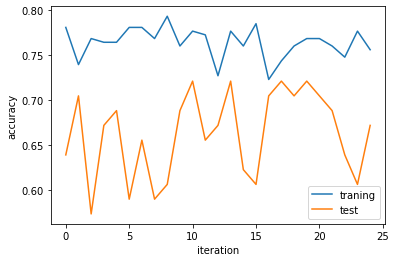

In [15]:
plt.plot(results_train, label="traning")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()

sytuacja trochę lepsza - na zbiorze treningowym wartości 73 - 79%; natomiast na zbiorze testowym - 61 - 72% (najczęściej 65)
mamy tu do czynienia z niedouczeniem - na zbiorze testowym wyraźnie gorzej

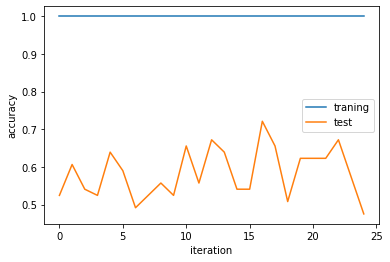

In [16]:
def clasification(X,y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = r_state)
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)
#uzupełnij reszt tak jak zwykle. liczba sąsiadów to 1 

results_train = []
results_test = []
for i in range(0,50,2):
    results = clasification(X,y, i)
    results_train.append(results[0])
    results_test.append(results[1])
    
plt.plot(results_train, label="traning")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()

tu mamy idealną skuteczność na zbiorze treningowym, wszystkie próbki zostały dobrze zakwalifikowane (100%) za to jeżeli chodzi o zbiór testowy to jest niemal losowo (słabo ugółem)
jeżeli mamy tak dużą rozbieżność mówimy o przeuczeniu 
klasyczny przypadek przeuczenia się tytaj dzieje

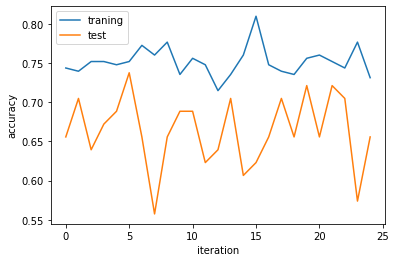

In [19]:
def clasification(X,y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = r_state)
    model = KNeighborsClassifier(n_neighbors = 6)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)
#uzupełnij reszt tak jak zwykle. liczba sąsiadów to 6 

results_train = []
results_test = []
for i in range(0,50,2):
    results = clasification(X,y, i)
    results_train.append(results[0])
    results_test.append(results[1])
    

plt.plot(results_train, label="traning")
plt.plot(results_test, label="test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()

testowy - 65 - 70
treningowy - ok 75
tego właśnie poszukujemy; chcemy, zeby wartości na zbiorze treningowym były minimalnie większe, ale żeby to były stałe wartości 

żeby stwierdzić, czy model jest przeuczony, musimy mieć dane z predykcji w czasie treningu (podglądamy jak nauczył się w czasie treningu) oraz dane z predykcji w czasi testu
po prostu robimy porównanie jak on rozpoznaje na danych, które już widział vs na danych, których jeszcze nie widział

jeśli wykresy się pokrywają:
- całkowicie - git
- jeżeli się tak przeplatają - znaczy, że wkrada się tam pewna losowość + wartość na treningowym mniejsza niż na testowym totalnie powoduje zapalenie się czerwonej lampki - coś jest nie tak jak powinno